# ASSIGNMENT OF BUSINESS ANALYST INTERN [JAR]

## PART A : Sales and Profitability Analysis

In [189]:
# import lib and datasets.

import numpy as ny
import pandas as pd
import matplotlib.pyplot as plts
import seaborn as sea


##  a.) Merge List of Orders with Order Details on basis of Ordered_id.

In [192]:
# listing each dataset unique name to load the dataset.

lists_df = pd.read_csv('LIST OF ORDERS.csv')
ordered_list_df = pd.read_csv('ORDERED DETAILS.csv')

# Merging into single dataset for better calculation as 'merged_list'.

merged = pd.merge(lists_df, ordered_list_df, on= "Order ID", how= "inner")
merged.head(16)


,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole
2,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,01-04-2018,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones
5,B-25602,01-04-2018,Pearl,Maharashtra,Pune,424.0,-272.0,5,Electronics,Phones
6,B-25602,01-04-2018,Pearl,Maharashtra,Pune,2617.0,1151.0,4,Electronics,Phones
7,B-25602,01-04-2018,Pearl,Maharashtra,Pune,561.0,212.0,3,Clothing,Saree
8,B-25602,01-04-2018,Pearl,Maharashtra,Pune,119.0,-5.0,8,Clothing,Saree
9,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal,1355.0,-60.0,5,Clothing,Trousers


## b.)Calculate the total sales (Amount) for each category across all orders. 

In [202]:
# Calculating the total sales for each category across all orders by groupby method from above 'merged_df'.

Sales = merged.groupby('Category')['Amount'].sum()
print("Across all orders from each Category across all orders")
print(Sales)



Across all orders from each Category across all orders
Category
Clothing       139054.0
Electronics    165267.0
Furniture      127181.0
Name: Amount, dtype: float64


## c.) For each category, Calculate the 'average profit per order' and 'total profit margin (profit as a percentage of Amount).


For each Category the average profit per order & total profit margin [profit as a percentage of amount]:

              avg_profit  total profit margin%
Category                                     
Clothing      11.762908              8.027817
Electronics   34.071429              6.349725
Furniture      9.456790              1.806874


C:\Users\HEMARIS\AppData\Local\Temp\ipykernel_7600\2610649686.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profits_metrics.index,
C:\Users\HEMARIS\AppData\Local\Temp\ipykernel_7600\2610649686.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
C:\Users\HEMARIS\AppData\Local\Temp\ipykernel_7600\2610649686.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profits_metrics.index,
C:\Users\HEMARIS\AppData\Local\Temp\ipykernel_7600\2610649686.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of t

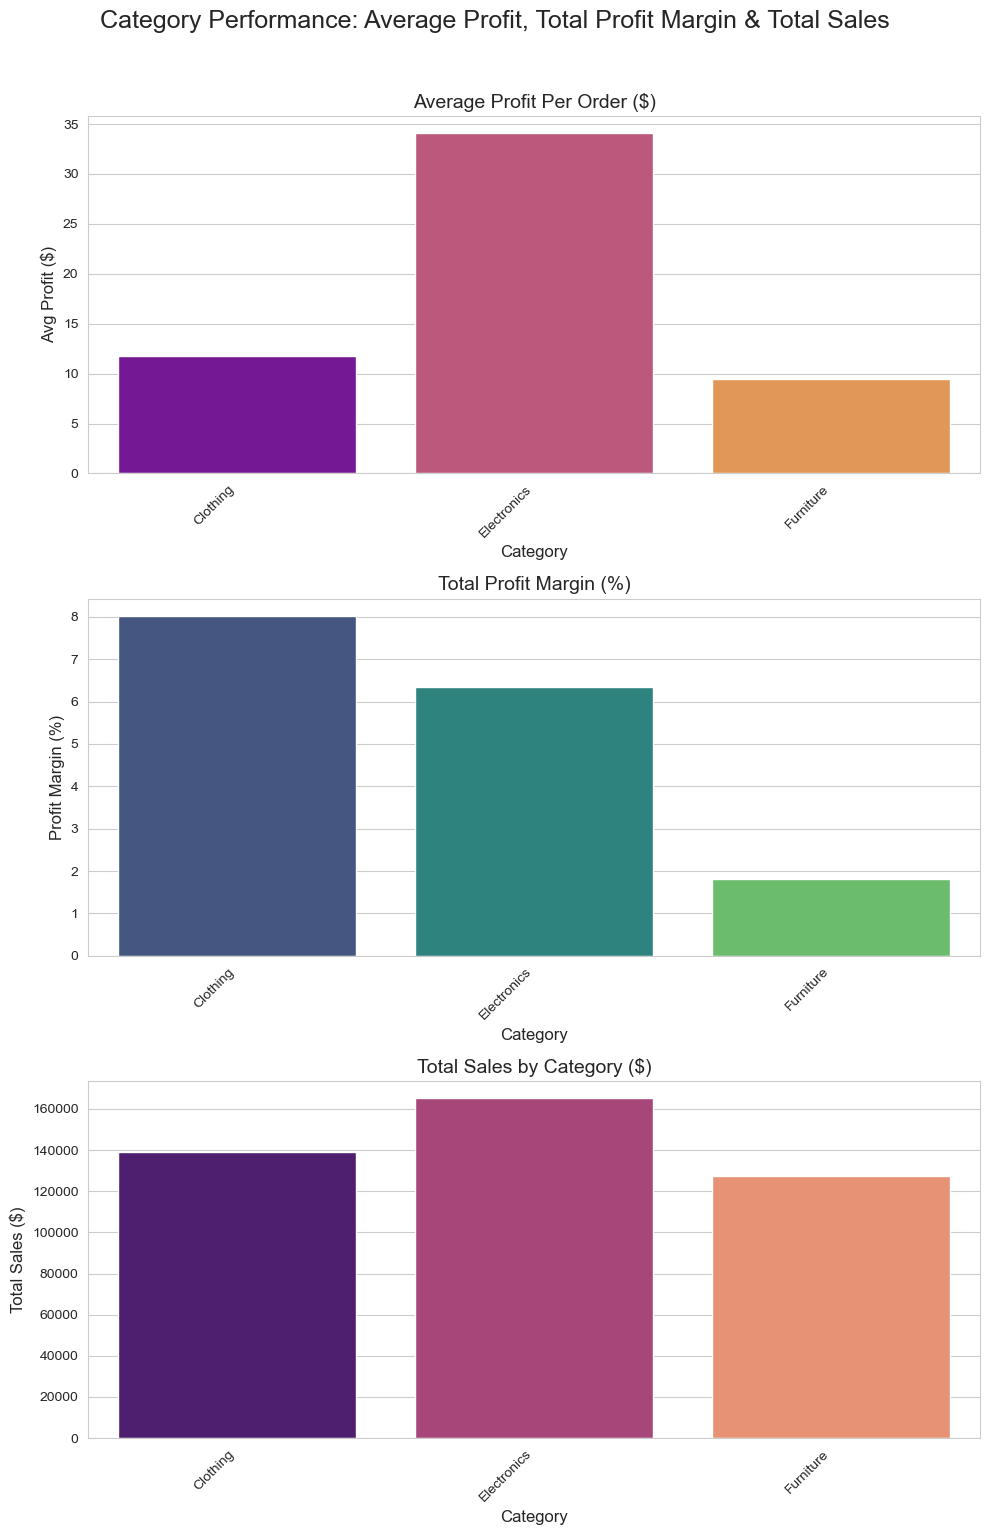

In [205]:
# Calculating average profit per order by each category # using 'aggresion' is for mutliple calculations simultaneously.

# --- Calculate Profit Metrics ---

# Using 'merged' for consistency with previous steps.
# Naming conventions adjusted to match your provided code ('avg_profit', 'Total_Profit', 'Total_Sales').

profits_metrics = merged_sales_data.groupby('Category').agg(
    avg_profit=('Profit', 'mean'),
    Total_Profit=('Profit', 'sum'),
    Total_Sales=('Amount', 'sum'))                                # Renamed from 'Total_Amount' to 'Total_Sales' for clarity


# Calculate total profit margin as a percentage
# Added epsilon to Total_Sales to prevent division by zero errors for categories with no sales.


profits_metrics['total profit margin%'] = (
    (profits_metrics['Total_Profit'] / (profits_metrics['Total_Sales'])) * 100)

print("\nFor each Category the average profit per order & total profit margin [profit as a percentage of amount]:")
print("\n", profits_metrics[['avg_profit', 'total profit margin%']])

# --- Visualization Method ---
sns.set_style("whitegrid")

# Creating subplots for organizing charts.
# Changed 'plts' to 'plt'
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15)) # Adjusted figsize for better viewing
fig.suptitle('Category Performance: Average Profit, Total Profit Margin & Total Sales', fontsize=18, y=1.02) # Adjusted title and fontsize

# Plot 1: Average Profit Per Order
sns.barplot(x=profits_metrics.index,
            y=profits_metrics['avg_profit'],
            ax=axes[0],
            palette='plasma')
axes[0].set_title('Average Profit Per Order ($)', fontsize=14) # Adjusted title
axes[0].set_xlabel('Category', fontsize=12)
axes[0].set_ylabel('Avg Profit ($)', fontsize=12) # Adjusted label
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Plot 2: Total Profit Margin (%)
sns.barplot(x=profits_metrics.index,
            y=profits_metrics['total profit margin%'],
            ax=axes[1],
            palette='viridis') # Changed palette for visual distinction
axes[1].set_title('Total Profit Margin (%)', fontsize=14) # Adjusted title
axes[1].set_xlabel('Category', fontsize=12)
axes[1].set_ylabel('Profit Margin (%)', fontsize=12) # Adjusted label
axes[1].ticklabel_format(style='plain', axis='y')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

# Plot 3: Total Sales by Category
sns.barplot(x=profits_metrics.index,
            y=profits_metrics['Total_Sales'],
            ax=axes[2],
            palette='magma') # Changed palette for visual distinction
axes[2].set_title('Total Sales by Category ($)', fontsize=14) # Adjusted title
axes[2].set_xlabel('Category', fontsize=12)
axes[2].set_ylabel('Total Sales ($)', fontsize=12)
axes[2].ticklabel_format(style='plain', axis='y')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')

# Removed plt.subplots_adjust(wspace =555) as it causes extreme spacing issues.
# tight_layout handles spacing well for readability.
plt.tight_layout()
plt.show()


## c.) Identify Top-Performing and Underperforming Categories Based on Each Metrics.

In [117]:


print("\n--- Identifying Top/Underperforming Categories ---")

# 1. Based on Total Sales
print("\n* Performance by Total Sales:")
# Sort by 'Total_Sales' column to find top and bottom
sorted_by_sales = profits_metrics.sort_values(by='Total_Sales', ascending=False)
if not sorted_by_sales.empty:
    top_sales_cat = sorted_by_sales.index[0]
    under_sales_cat = sorted_by_sales.index[-1]
    print(f"  Top Performer (Total Sales): '{top_sales_cat}' (Sales: ${sorted_by_sales.iloc[0]['Total_Sales']:.2f})")
    print(f"  Underperformer (Total Sales): '{under_sales_cat}' (Sales: ${sorted_by_sales.iloc[-1]['Total_Sales']:.2f})")
else:
    print("  No sales data available for identification.")


# 2. Based on Average Profit Per Order
print("\n* Performance by Average Profit Per Order:")
# Sort by 'avg_profit' column to find top and bottom
sorted_by_avg_profit = profits_metrics.sort_values(by='avg_profit', ascending=False)
if not sorted_by_avg_profit.empty:
    top_avg_profit_cat = sorted_by_avg_profit.index[0]
    under_avg_profit_cat = sorted_by_avg_profit.index[-1]
    print(f"  Top Performer (Avg Profit per Order): '{top_avg_profit_cat}' (Avg Profit: ${sorted_by_avg_profit.iloc[0]['avg_profit']:.2f})")
    print(f"  Underperformer (Avg Profit per Order): '{under_avg_profit_cat}' (Avg Profit: ${sorted_by_avg_profit.iloc[-1]['avg_profit']:.2f})")
else:
    print("  No average profit data available for identification.")


# 3. Based on Total Profit Margin (%)
print("\n* Performance by Total Profit Margin (%):")
# Filter out categories with zero or negative sales before sorting for margin, to avoid misleading values
filtered_for_margin_sort = profits_metrics[profits_metrics['Total_Sales'] > 0]
if not filtered_for_margin_sort.empty:
    # Sort by 'total profit margin%' column to find top and bottom
    sorted_by_margin = filtered_for_margin_sort.sort_values(by='total profit margin%', ascending=False)
    top_margin_cat = sorted_by_margin.index[0]
    under_margin_cat = sorted_by_margin.index[-1]
    print(f"  Top Performer (Total Profit Margin %): '{top_margin_cat}' (Margin: {sorted_by_margin.iloc[0]['total profit margin%']:.2f}%)")
    print(f"  Underperformer (Total Profit Margin %): '{under_margin_cat}' (Margin: {sorted_by_margin.iloc[-1]['total profit margin%']:.2f}%)")
else:
    print("  No categories with positive sales to calculate profit margin for identification.")



--- Identifying Top/Underperforming Categories ---

* Performance by Total Sales:
  Top Performer (Total Sales): 'Electronics' (Sales: $165267.00)
  Underperformer (Total Sales): 'Furniture' (Sales: $127181.00)

* Performance by Average Profit Per Order:
  Top Performer (Avg Profit per Order): 'Electronics' (Avg Profit: $34.07)
  Underperformer (Avg Profit per Order): 'Furniture' (Avg Profit: $9.46)

* Performance by Total Profit Margin (%):
  Top Performer (Total Profit Margin %): 'Clothing' (Margin: 8.03%)
  Underperformer (Total Profit Margin %): 'Furniture' (Margin: 1.81%)


## PART B : Target Achievement Analysis


### Q.1 Using the Sales Target dataset, calculate the percentage change in target sales
### for the Furniture category month-over-month.

In [211]:
import pandas as pd

# Load the dataset from the CSV file
df = pd.read_csv('SALES TARGET.csv')

# Convert the 'Month' column to datetime objects
df['Month'] = pd.to_datetime(df['Month'])

# Filter the DataFrame to include only rows where the 'Category' is 'Furniture'
furniture_df = df[df['Category'] == 'Furniture']

# Set the 'Month' column as the DataFrame's index and sort it chronologically
furniture_df = furniture_df.set_index('Month').sort_index()

# Calculate the month-over-month percentage change for 'Target' sales.
# .pct_change() calculates the percentage change between the current and a prior element.
# Multiplying by 100 converts the decimal to a percentage.

furniture_df['Percentage Change'] = furniture_df['Target'].pct_change() * 100

# Print the 'Target' sales and the calculated 'Percentage Change' for each month
print("\n",furniture_df[['Target', 'Percentage Change']])



             Target  Percentage Change
Month                                
2018-01-04   10400                NaN
2018-01-05   10500           0.961538
2018-01-06   10600           0.952381
2018-01-07   10800           1.886792
2018-01-08   10900           0.925926
2018-01-09   11000           0.917431
2018-01-10   11100           0.909091
2018-01-11   11300           1.801802
2018-01-12   11400           0.884956
2019-01-01   11500           0.877193
2019-01-02   11600           0.869565
2019-01-03   11800           1.724138


## Q2. Analyse the trends to identify months with significant target fluctuations.

In [215]:
df['Month'] = pd.to_datetime(df['Month'])

# Aggregate 'Target' sales by month to get total monthly targets periods.

monthly_targets = df.groupby('Month')['Target'].sum().sort_index()

# Calculate the month-over-month percentage change in total targets
monthly_targets_df = monthly_targets.to_frame()

# The first month will have NaN as there's no prior month to compare
monthly_targets_df['Percentage Change'] = monthly_targets_df['Target'].pct_change() * 100

# Identify months where the absolute percentage change exceeds the threshold
significant_fluctuations = monthly_targets_df[
    monthly_targets_df['Percentage Change'].abs() > fluctuation_threshold]

print("Monthly Total Targets and Percentage Change:")
print(monthly_targets_df)
print("\nMonths with Significant Target Fluctuations)".format(fluctuation_threshold))
print(significant_fluctuations)

Monthly Total Targets and Percentage Change:
            Target  Percentage Change
Month                                
2018-01-04   31400                NaN
2018-01-05   31500           0.318471
2018-01-06   31600           0.317460
2018-01-07   33800           6.962025
2018-01-08   33900           0.295858
2018-01-09   34000           0.294985
2018-01-10   36100           6.176471
2018-01-11   36300           0.554017
2018-01-12   36400           0.275482
2019-01-01   43500          19.505495
2019-01-02   43600           0.229885
2019-01-03   43800           0.458716

Months with Significant Target Fluctuations)
            Target  Percentage Change
Month                                
2018-01-07   33800           6.962025
2018-01-10   36100           6.176471
2019-01-01   43500          19.505495


## PART 3 : REGIONAL PERFORMANCE INSIGHTS

### Q1.) From the List of Orders dataset, identify the top 5 states with the highest order
### count.

In [220]:
import pandas as pd

# Load the merged dataset
try:
    df = pd.read_csv('Merge List.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'Merge List.csv' not found. Please ensure the file is in the correct directory.")
    exit()

# Ensure 'State' column exists
if 'State' not in df.columns:
    print("Error: Required column 'State' not found in the dataset.")
    exit()

# Identify the top 5 states with the highest order count
# We count the occurrences of each state in the 'State' column.
state_order_counts = df['State'].value_counts()

# Get the top 5 states
top_5_states_basic = state_order_counts.head(5)

print("\nTop 5 States by Order Count:")
print(top_5_states_basic.to_markdown())

print("\n Explanation ")
print("The table above shows the top 5 states ranked by their order count, along with the count for each state.")

Dataset loaded successfully.

Top 5 States by Order Count:
| State          |   count |
|:---------------|--------:|
| Madhya Pradesh |     340 |
| Maharashtra    |     290 |
| Gujarat        |      87 |
| Delhi          |      74 |
| Rajasthan      |      74 |

 Explanation 
The table above shows the top 5 states ranked by their order count, along with the count for each state.


### Q2. For each of these states, calculate the total sales and average profit.

In [223]:
ds = pd.read_csv('Merge List.csv')


target_state = 'Madhya Pradesh' 
state_data = df[df['State'] == target_state]

if not state_data.empty:
    total_sales = state_data['Amount'].sum()      # Sum of the 'Amount' column
    average_profit = state_data['PROFIT'].mean()
    print(f"\nResults for '{target_state}':")
    print(f"  Total Sales (Amount): {total_sales:.2f}") # .2f formats to 2 decimal places
    print(f"  Average Profit: {average_profit:.2f}")
else:
    print(f"\nNo data found for '{target_state}' in the dataset.")

# MAHARASHTRA STATE

target_state = 'Maharashtra' 
state_data = df[df['State'] == target_state]

if not state_data.empty:
    total_sales = state_data['Amount'].sum()      # Sum of the 'Amount' column
    average_profit = state_data['PROFIT'].mean()
    print(f"\nResults for '{target_state}':")
    print(f"  Total Sales (Amount): {total_sales:.2f}") # .2f formats to 2 decimal places
    print(f"  Average Profit: {average_profit:.2f}")
else:
    print(f"\nNo data found for '{target_state}' in the dataset.")


# GUJARAT STATE

target_state = 'Gujarat' 
state_data = df[df['State'] == target_state]

if not state_data.empty:
    total_sales = state_data['Amount'].sum()      # Sum of the 'Amount' column
    average_profit = state_data['PROFIT'].mean()
    print(f"\nResults for '{target_state}':")
    print(f"  Total Sales (Amount): {total_sales:.2f}") # .2f formats to 2 decimal places
    print(f"  Average Profit: {average_profit:.2f}")
else:
    print(f"\nNo data found for '{target_state}' in the dataset.")

# DELHI STATE

target_state = 'Delhi' 
state_data = df[df['State'] == target_state]

if not state_data.empty:
    total_sales = state_data['Amount'].sum()      # Sum of the 'Amount' column
    average_profit = state_data['PROFIT'].mean()
    print(f"\nResults for '{target_state}':")
    print(f"  Total Sales (Amount): {total_sales:.2f}") # .2f formats to 2 decimal places
    print(f"  Average Profit: {average_profit:.2f}")
else:
    print(f"\nNo data found for '{target_state}' in the dataset.")


# RAJASTHAN STATE

target_state = 'Rajasthan' 
state_data = df[df['State'] == target_state]

if not state_data.empty:
    total_sales = state_data['Amount'].sum()      # Sum of the 'Amount' column
    average_profit = state_data['PROFIT'].mean()
    print(f"\nResults for '{target_state}':")
    print(f"  Total Sales (Amount): {total_sales:.2f}") # .2f formats to 2 decimal places
    print(f"  Average Profit: {average_profit:.2f}")
else:
    print(f"\nNo data found for '{target_state}' in the dataset.")

print("\n ____Analysis Completed_____") 


Results for 'Madhya Pradesh':
  Total Sales (Amount): 105140.00
  Average Profit: 16.33

Results for 'Maharashtra':
  Total Sales (Amount): 95348.00
  Average Profit: 21.30

Results for 'Gujarat':
  Total Sales (Amount): 21058.00
  Average Profit: 5.34

Results for 'Delhi':
  Total Sales (Amount): 22531.00
  Average Profit: 40.36

Results for 'Rajasthan':
  Total Sales (Amount): 21149.00
  Average Profit: 16.99

 ____Analysis Completed_____
